# Legend Guide

## Controlling the legend entries

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

import numpy as np
import pandas as pd


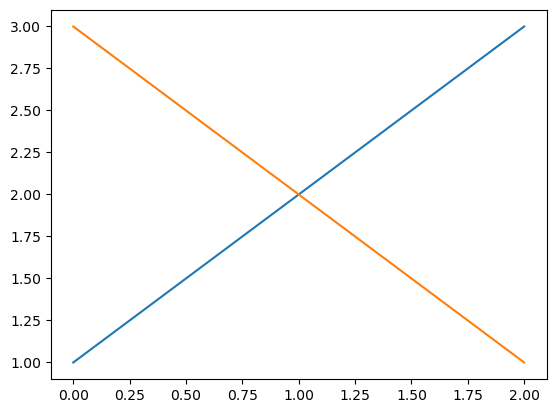

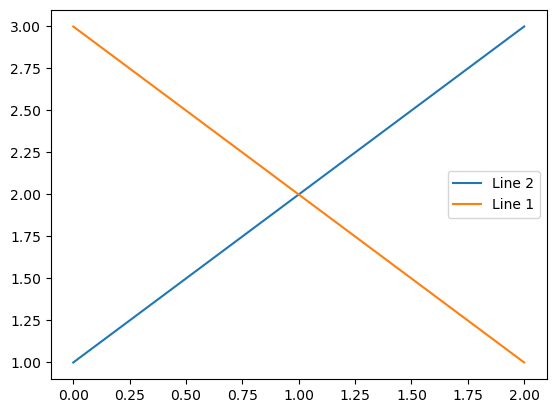

In [15]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2') # plot을 하면 list를 반환... 거기서 일부만을 꺼내오는거라 , 붙어야 한다.
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend(handles=[line_up, line_down])

plt.show()



## 

## Proxy Artists - 값의 라벨에 관계없이 '척도' 추가하기

In [16]:
import matplotlib.patches as mpatches

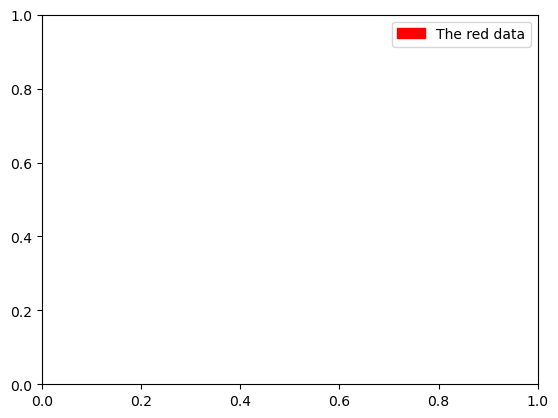

In [54]:
# 어떠한 값, plot 없이 legend만 넣어줄 수 있다.

fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])

plt.show()

In [20]:
import matplotlib.lines as mlines

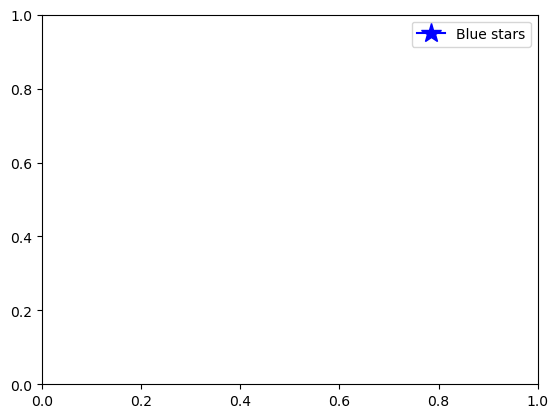

In [22]:
# handles는 꽤 넓은 범위를 다룰 수 있다. Line도 되고, Patch도 되고

fig, ax = plt.subplots()
blue_line = mlines.Line2D([], [], color='blue', marker='*', markersize=15, label='Blue stars')
ax.legend(handles=[blue_line])

plt.show()

# legend 위치를 설정하기

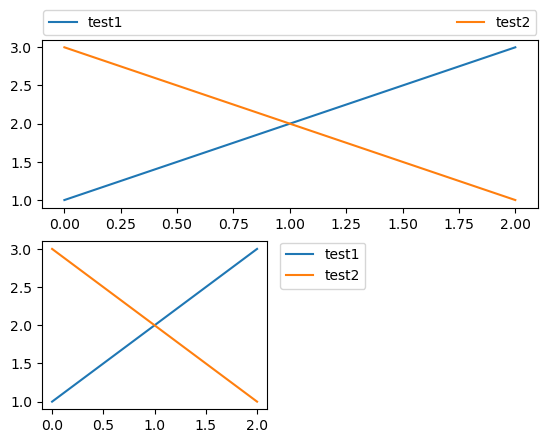

In [35]:
# 레전드의 위치를 조절해보자. - ax가 아니라 figure로 뺄 수 있다.

fig, ax_dict = plt.subplot_mosaic([['top', 'top'], ['bottom', 'BLANK']],
                                 empty_sentinel='BLANK')
ax_dict['top'].plot([1, 2, 3], label='test1')
ax_dict['top'].plot([3, 2, 1], label='test2')

ax_dict['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', 
                      ncol=2, mode="expand", borderaxespad=0.1)

ax_dict['bottom'].plot([1, 2, 3], label='test1')
ax_dict['bottom'].plot([3, 2, 1], label='test2')

ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)

plt.show()

# 하나의 axes에 여러 legend를 구현하기

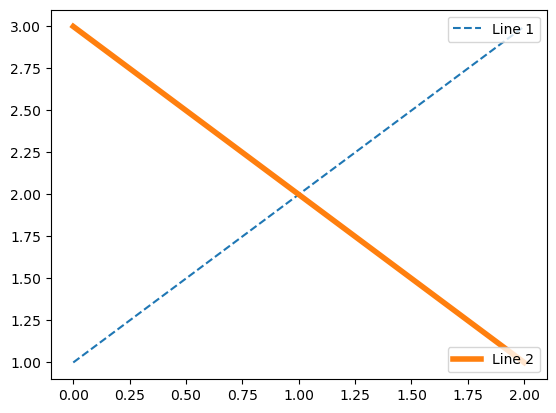

In [36]:
fig, ax = plt.subplots()
line1, = ax.plot([1, 2, 3], label='Line 1', linestyle='--') 
line2, = ax.plot([3, 2, 1], label='Line 2', linewidth=4)

# 레전드를 만드는 법
first_legend = ax.legend(handles=[line1], loc='upper right')

# 수동으로 add_artist를 통해서 추가 하는 법 
ax.add_artist(first_legend)

# line2를 위한 Legend 만들기
second_legend = ax.legend(handles=[line2], loc='lower right')

plt.show()

# Legend Handlers 라는 것은 무엇일까?

handles가 HandlerBase 서브 클래스로 들어간다고? </br>
이런 것들이 get_legend_handler()에서 구현된다고?</br>
핸들러가 필요한건 알겠어. 근데 핸들러가 뭔데? </br>

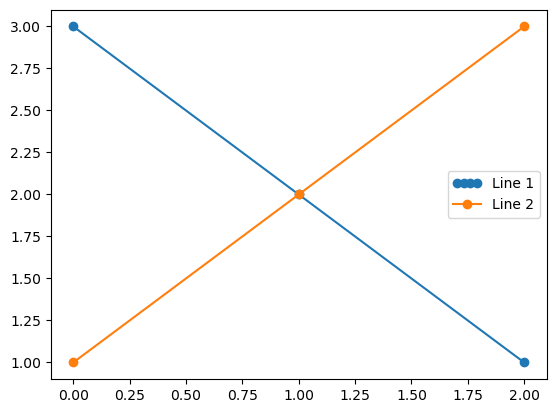

In [39]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots()
line1, = ax.plot([3, 2, 1], marker='o', label='Line 1')
line2, = ax.plot([1, 2, 3], marker='o', label='Line 2')

ax.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

plt.show()

### Legend key 합치기

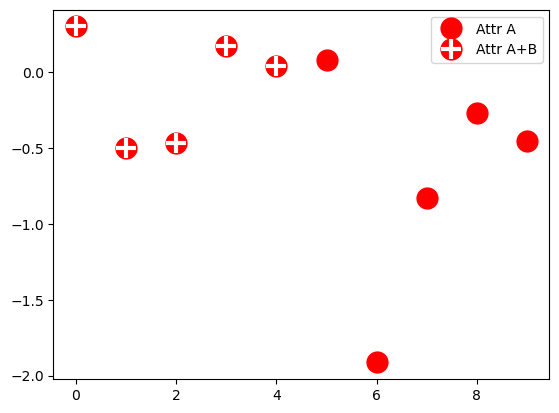

In [46]:
z = np.random.randn(10)

fig, ax = plt.subplots()
red_dot, = ax.plot(z, "ro", markersize=15)

# 하얀 십자가를 데이터위에 좀 두자.
white_cross, = ax.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

ax.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

plt.show()

In [47]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

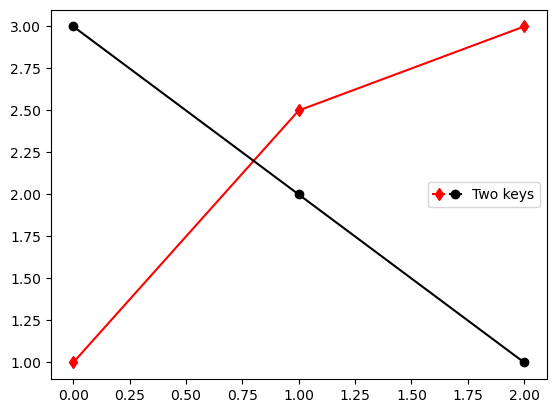

In [53]:
fig, ax = plt.subplots()

p1, = ax.plot([1, 2.5, 3], 'r-d')
p2, = ax.plot([3, 2, 1], 'k-o')

l = ax.legend([(p1,p2)], ['Two keys'], numpoints=1,
              handler_map={tuple: HandlerTuple(ndivide=None)})

plt.show()

## 커스텀된 legend 핸들러를 구현해보자

Customhandler를 구현해주는 방법에 대해 설명한다. </br>
handler없이 클래스를 구현해서 Custom해준다. 

In [55]:
import matplotlib.patches as mpatches

In [63]:
class AnyObject :
    pass

class AnyObjectHandler :
    def legend_artist(self, legend, orig_handle, fontsize, handlebox) :
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, 
                                   facecolor='red', edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch
    
    # return은 single artist가 리턴되어야 한다. - 여기선 patch
    


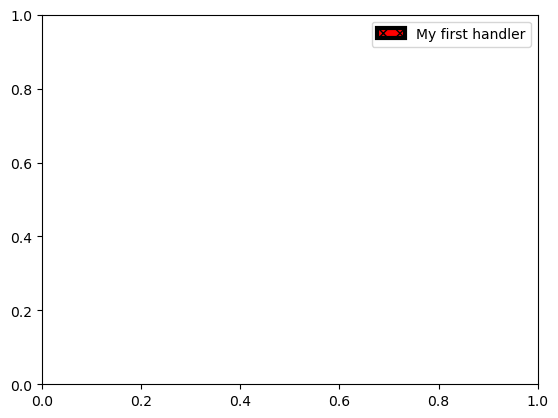

In [61]:
fig, ax = plt.subplots()

ax.legend([AnyObject()], ['My first handler'], 
         handler_map={AnyObject: AnyObjectHandler()})

plt.show()

### 새로운 핸들러를 등록하자

In [66]:
from matplotlib.legend import Legend

In [67]:
Legend.update_default_handler_map({AnyObject: AnyObjectHandler()})

### 타원형 legend key를 만들어보자

In [68]:
from matplotlib.legend_handler import HandlerPatch

In [70]:
class HandlerEllipse(HandlerPatch) :
    def create_artists(self, legend, orig_handle,
                      xdescent, ydescent, width, height, fontsize,
                      trans) :
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent, 
                            height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

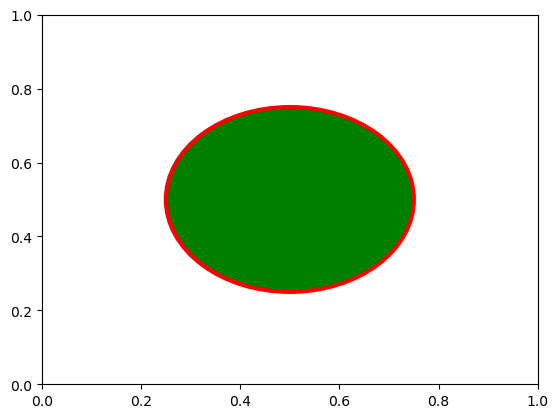

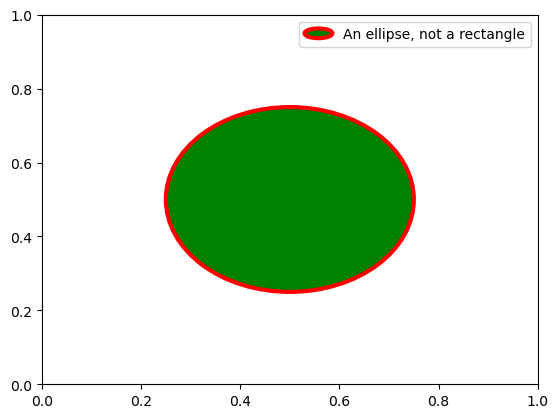

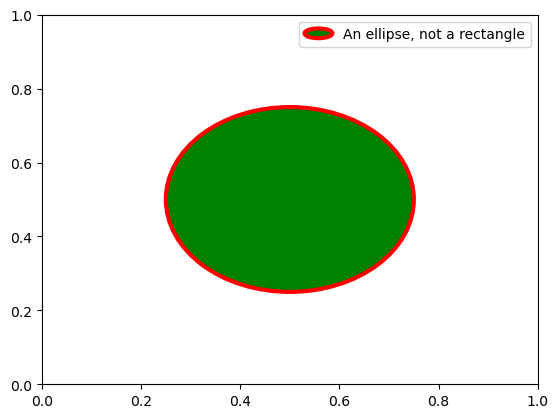

In [72]:
c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green", edgecolor="red", linewidth=3)

fig, ax = plt.subplots()

ax.add_patch(c)
ax.legend([c], ["An ellipse, not a rectangle"],
         handler_map={mpatches.Circle: HandlerEllipse()})

plt.show()